# Google Stock price predictions

## Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

### Load the dataset

In [2]:
train_ds = pd.read_csv('Google_Stock_Price_Train.csv')
test_ds = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
train_ds.head(4)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"


In [4]:
train_ds1= train_ds.iloc[:,1:2].values
train_ds1

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Scale the values

In [5]:
from sklearn.preprocessing import MinMaxScaler
scale  = MinMaxScaler()
scaled_values = scale.fit_transform(train_ds1)

### get the X_train and y_train

In [6]:
x_train=[]
y_train=[]

for i in range(60,1258):
    x_train.append(scaled_values[i-60:i,0])
    y_train.append(scaled_values[i,0])

x_train, y_train =np.array(x_train),np.array(y_train)

In [7]:
# change the shape of array ,since RNN requires the 3D tensor i.e.(batch size,time stamps,no.of predictors)

x_train_s = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

## Building the Model

In [8]:
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [24]:
reg_model = Sequential([
    LSTM(units=100,return_sequences=True,input_shape =(x_train_s.shape[1],1)),
    Dropout(0.3),
    LSTM(units=100,return_sequences=True),
    Dropout(0.3),
    LSTM(units=100,return_sequences=True),
    Dropout(0.3),
    LSTM(units=50,return_sequences=True),
    LSTM(units=100,return_sequences=False),
    Dense(units=1)
])
reg_model.summary()

c:\Users\asus\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 60, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,301 (1.12 MB)

 Trainable params: 292,301 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

reduce_lr = ReduceLROnPlateau(monitor='loss',factor=0.2,patience =3, min_lr = 0.0000001)


In [26]:
reg_model.compile(optimizer='RMSprop',loss='mean_squared_error')

In [27]:
hist = reg_model.fit(x_train_s,y_train,epochs=100,batch_size=64)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step - loss: 0.1612
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 294ms/step - loss: 0.0215
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - loss: 0.0120
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - loss: 0.0146
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - loss: 0.0156
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - loss: 0.0132
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - loss: 0.0088
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - loss: 0.0096
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - loss: 0.0115
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - loss: 0.0101
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - loss: 0.0108
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - loss: 0.0084
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - loss: 0.0078
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - loss: 0.0049
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s

## Prediction

In [28]:
realstock_price = test_ds.iloc[:,1:2].values

In [29]:
ds = pd.concat((train_ds['Open'],test_ds['Open']),axis=0)
inputs = ds[len(ds)-len(test_ds)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scale.transform(inputs)


In [30]:
x_test=[]

for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

x_test=np.array(x_test)


In [31]:
X_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_price = reg_model.predict(X_test)
predicted_price = scale.inverse_transform(predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


In [32]:
print(predicted_price)

[[764.5]
 [763.5]
 [762. ]
 [760.5]
 [759.5]
 [758.5]
 [758.5]
 [759.5]
 [761. ]
 [763.5]
 [765.5]
 [767.5]
 [769.5]
 [771. ]
 [772. ]
 [773.5]
 [774.5]
 [775.5]
 [777.5]
 [779.5]]


### visualise the results

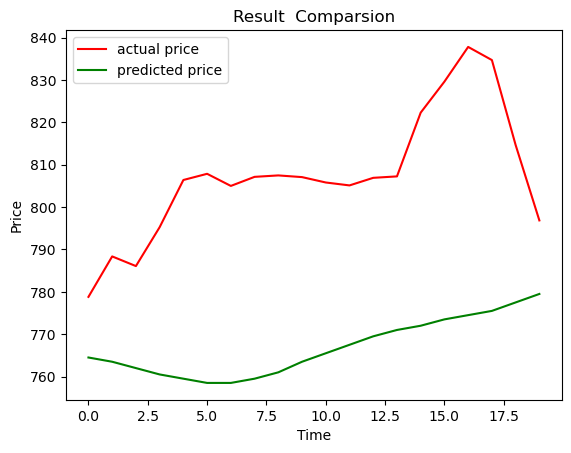

In [33]:
plt.plot(realstock_price,color='red',label='actual price')


plt.plot(predicted_price,color='green',label='predicted price')
plt.title('Result  Comparsion')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [34]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(realstock_price,predicted_price))
print(rmse)

42.64260580686879


In [36]:
ab = predicted_price/rmse
print(ab)

[[17.92]
 [17.9 ]
 [17.86]
 [17.83]
 [17.81]
 [17.78]
 [17.78]
 [17.81]
 [17.84]
 [17.9 ]
 [17.95]
 [18.  ]
 [18.05]
 [18.08]
 [18.1 ]
 [18.14]
 [18.16]
 [18.19]
 [18.23]
 [18.28]]
